# Visualization and Pre-Analysis

visualization modules:

In [18]:
from matplotlib import pyplot as plt  
%matplotlib inline 
import seaborn as sb

In [50]:
import vincent
reload(vincent)
vincent.initialize_notebook()

In [17]:
data=pd.read_csv('clean_data.csv',sep=',')
len(data)

1760

## data

In [19]:
import pandas as pd 
import numpy as nm

We are going to predict song_hotness:

In [20]:
#let's see what unique values we have
for col in data.columns:
    print "%s has %s unique categories" % (col, data[col].nunique())

Unnamed: 0 has 1760 unique categories
song_id has 1760 unique categories
play_count_sum has 556 unique categories
user_id_count has 399 unique categories
track_id has 1760 unique categories
genre_id has 20 unique categories
artist_familiarty has 1078 unique categories
artist_hotness has 1065 unique categories
artist_id has 1058 unique categories
artist_latitude has 262 unique categories
artist_location has 469 unique categories
artist_longitude has 262 unique categories
artist_names has 1058 unique categories
song_durations has 1626 unique categories
song_hotness has 862 unique categories
song_release_years has 50 unique categories
song_titles has 1747 unique categories
song_bars has 1757 unique categories
song_beats has 1757 unique categories
song_keys has 12 unique categories
song_modes has 2 unique categories
song_tatum has 1757 unique categories
song_tempo has 1735 unique categories
song_time_signatures has 6 unique categories
count has 1 unique categories
beats_number has 1405 uni

In [21]:
data.describe()

,Unnamed: 0,play_count_sum,user_id_count,artist_familiarty,artist_hotness,artist_latitude,artist_longitude,song_durations,song_hotness,song_release_years,song_keys,song_modes,song_tempo,song_time_signatures,count,beats_number,bars_number,tatum_number,log_play_count_sum,log_user_id_count
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,879.500000,462.388068,182.150000,0.651306,0.455407,14.555694,-26.317367,241.905996,0.509295,1999.076705,5.376136,0.672159,125.041325,3.636932,1,6055.241477,1940.652273,4833.406818,3.877748,3.134512
std,508.212554,1909.025630,724.219197,0.130568,0.112417,20.844045,45.906739,100.514858,0.142346,8.402017,3.576739,0.469560,35.464805,1.185232,0,3378.891528,1788.931690,5690.317673,2.111355,1.933786
min,0.000000,1.000000,1.000000,0.015558,0.049034,-41.280540,-123.207900,7.130980,0.199238,1927.000000,0.000000,0.000000,0.000000,0.000000,1,2.000000,2.000000,2.000000,0.000000,0.000000
25%,439.750000,10.000000,6.000000,0.558481,0.375427,0.000000,-74.007120,187.388935,0.457420,1998.000000,2.000000,0.000000,98.524250,4.000000,1,3759.750000,1014.000000,109.000000,2.302585,1.791759
50%,879.500000,44.000000,18.000000,0.640708,0.438078,0.000000,0.000000,231.548930,0.463759,1998.000000,5.000000,1.000000,121.890000,4.000000,1,5555.500000,1448.000000,109.000000,3.784190,2.890372
75%,1319.250000,209.250000,83.250000,0.747557,0.519965,35.222500,0.000000,280.090972,0.606810,2005.000000,9.000000,1.000000,146.237500,4.000000,1,7895.000000,2065.250000,9536.250000,5.343528,4.421835
max,1759.000000,40739.000000,14729.000000,1.000000,1.082503,69.651020,174.767140,1204.296690,0.984347,2010.000000,11.000000,1.000000,253.357000,7.000000,1,17181.000000,16284.000000,17233.000000,10.614941,9.597574


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 30 columns):
Unnamed: 0              1760 non-null int64
song_id                 1760 non-null object
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
track_id                1760 non-null object
genre_id                1760 non-null object
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
artist_id               1760 non-null object
artist_latitude         1760 non-null float64
artist_location         1760 non-null object
artist_longitude        1760 non-null float64
artist_names            1760 non-null object
song_durations          1760 non-null float64
song_hotness            1760 non-null float64
song_release_years      1760 non-null float64
song_titles             1760 non-null object
song_bars               1760 non-null object
song_beats              1760 non-null object
song_keys               1760 non-n

Correlation:

In [23]:
data.corr()["song_hotness"]

Unnamed: 0              0.010166
play_count_sum          0.268492
user_id_count           0.282878
artist_familiarty       0.480824
artist_hotness          0.434708
artist_latitude        -0.036513
artist_longitude        0.023559
song_durations         -0.026056
song_hotness            1.000000
song_release_years      0.124657
song_keys              -0.001993
song_modes             -0.002605
song_tempo              0.056328
song_time_signatures    0.050699
count                        NaN
beats_number            0.030906
bars_number            -0.028079
tatum_number            0.002781
log_play_count_sum      0.520569
log_user_id_count       0.544442
Name: song_hotness, dtype: float64

Seems that the largest correlation exists between song hotness and Artist hotness and familiarty, after that with play count and user count (even better with the log columns!) and then maybe song release year. Since our artist location data was partial, we can ignore it for correlation. Very interesting that we have even is very slight but negative correlation with song duration and bars number. 

In [30]:
pivot = pd.pivot_table(data, values=['artist_familiarty'], index=['song_hotness'], columns=['artist_hotness'])
print (pivot)

               artist_familiarty                                      \
artist_hotness          0.049034 0.077842 0.144685 0.177894 0.190346   
song_hotness                                                           
0.199238                     NaN      NaN      NaN      NaN      NaN   
0.201387                     NaN      NaN      NaN      NaN      NaN   
0.203712                     NaN      NaN      NaN      NaN      NaN   
0.212045                     NaN      NaN      NaN      NaN      NaN   
0.212167                     NaN      NaN      NaN      NaN      NaN   
0.214253                     NaN      NaN      NaN      NaN      NaN   
0.215080                     NaN      NaN      NaN      NaN      NaN   
0.219529                     NaN      NaN      NaN      NaN      NaN   
0.228096                     NaN      NaN      NaN      NaN      NaN   
0.229144                     NaN      NaN      NaN      NaN      NaN   
0.233896                     NaN      NaN      NaN      NaN     

## visualizations

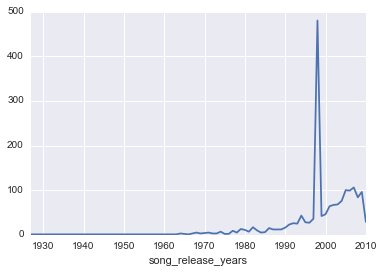

In [25]:
f=data.groupby('song_release_years').sum()['count'].plot()

The spike in the middle is because we substituted missing years with the median year. 

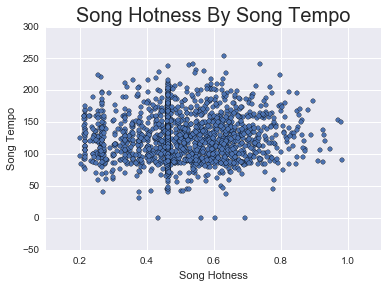

In [32]:
data.plot(x='song_hotness', y='song_tempo', kind='scatter')
f=plt.title('Song Hotness By Song Tempo',fontsize=20)
f=plt.ylabel('Song Tempo')
f=plt.xlabel('Song Hotness')

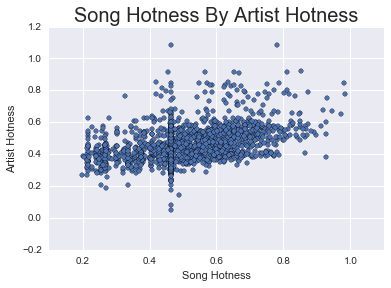

In [34]:
data.plot(x='song_hotness', y='artist_hotness', kind='scatter')
f=plt.title('Song Hotness By Artist Hotness',fontsize=20)
f=plt.ylabel('Artist Hotness')
f=plt.xlabel('Song Hotness')

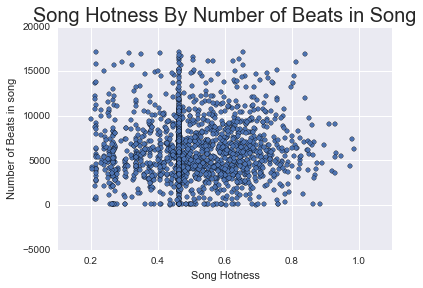

In [36]:
data.plot(x='song_hotness', y='beats_number', kind='scatter')
f=plt.title('Song Hotness By Number of Beats in Song',fontsize=20)
f=plt.ylabel('Number of Beats in song')
f=plt.xlabel('Song Hotness')

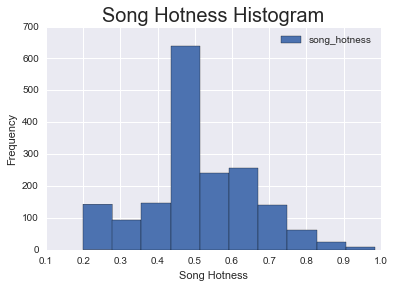

In [37]:
data.plot(x='beats_number', y='song_hotness', kind='hist')
f=plt.title('Song Hotness Histogram',fontsize=20)
f=plt.xlabel('Song Hotness')

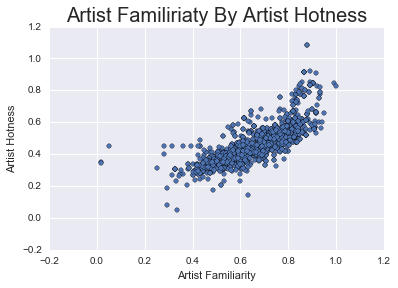

In [39]:
data.plot(x='artist_familiarty', y='artist_hotness', kind='scatter')
f=plt.title('Artist Familiriaty By Artist Hotness',fontsize=20)
f=plt.ylabel('Artist Hotness')
f=plt.xlabel('Artist Familiarity')

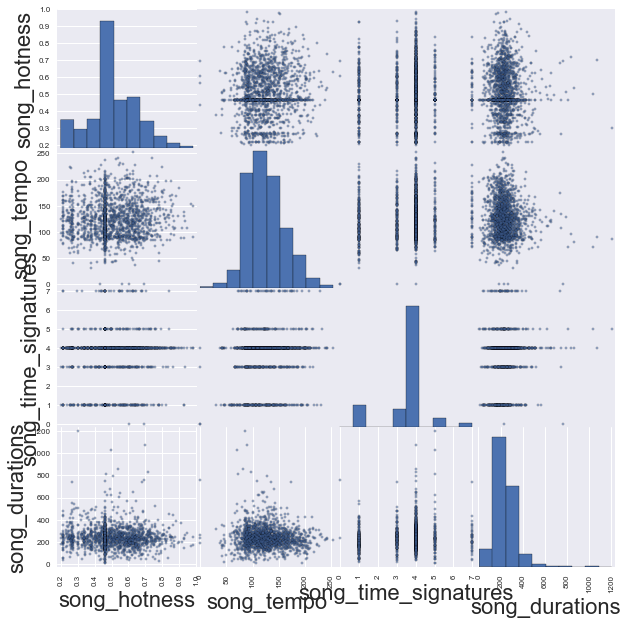

In [41]:
sb.set(font_scale=2)
_ = pd.scatter_matrix(data[['song_hotness', 'song_tempo', 'song_time_signatures', 'song_durations']], figsize=(10,10))

In [43]:
data.corr()["song_hotness"]

Unnamed: 0              0.010166
play_count_sum          0.268492
user_id_count           0.282878
artist_familiarty       0.480824
artist_hotness          0.434708
artist_latitude        -0.036513
artist_longitude        0.023559
song_durations         -0.026056
song_hotness            1.000000
song_release_years      0.124657
song_keys              -0.001993
song_modes             -0.002605
song_tempo              0.056328
song_time_signatures    0.050699
count                        NaN
beats_number            0.030906
bars_number            -0.028079
tatum_number            0.002781
log_play_count_sum      0.520569
log_user_id_count       0.544442
Name: song_hotness, dtype: float64

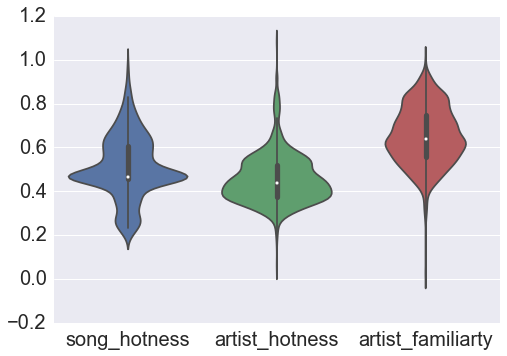

In [47]:
f = sb.violinplot(data[['song_hotness','artist_hotness','artist_familiarty']])

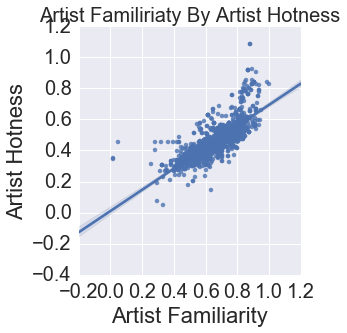

In [49]:
f=sb.lmplot('artist_familiarty','artist_hotness', data)
f=plt.title('Artist Familiriaty By Artist Hotness',fontsize=20)
f=plt.ylabel('Artist Hotness')
f=plt.xlabel('Artist Familiarity')

In [54]:
song_hot_tempo = data.groupby('song_hotness')[['beats_number']].mean()
scatter = vincent.Scatter(song_hot_tempo)
scatter.axis_titles(x='Song Hotness', y='Average Beats Number')
scatter.legend(title='Song Hotness by Number of Beats in Song')

In [56]:
a_f = data.groupby('song_time_signatures')[['song_hotness']].mean()
vincent.Bar(a_f)

In [58]:
song_energy = data.groupby('song_time_signatures')[['song_hotness']].mean()
vincent.Bar(song_energy)